## Groupby Pandas

GroupBy - функциональность pandas, которую следует использовать, когда мы хотим разбить таблицу по значениям какого-то столбца и посчитать статистику для этих таблиц.

Если вы знакомы с SQL, то это операция, аналогичная GROUP BY.

Разберем пример на данных пассажиров титаника: посчитаем долю выживших и средний возраст в каждом пассажирском классе.

In [2]:
import pandas as pd
# укажем максимальное количество строк вывода для удобства
pd.set_option('display.max_rows', 10)


# загрузим csv публичного датасета в pandas
titanic = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Для нашего примера возьмем колонки о выживаемости, возрасте и классе пассажира.

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')[
    ['survived', 'age', 'class']]
titanic

,survived,age,class
0,0,22.0,Third
1,1,38.0,First
2,1,26.0,Third
3,1,35.0,First
4,0,35.0,Third
...,...,...,...
886,0,27.0,Second
887,1,19.0,First
888,0,NaN,Third
889,1,26.0,First


Теперь применим метод `groupby()` к нашему `DataFrame`.

In [4]:
grouped_by_class = titanic.groupby('class')  # столбец, по которому группируем
grouped_by_class

`groupby()` вернул особый объект специального типа `DataFrameGroupBy`. По этому объекту можно проитерироваться и посмотреть, что внутри. 

In [5]:
# смотрим на объект
for pass_class, df_pass in grouped_by_class:
    print(pass_class)
    print(df_pass)

First
     survived   age  class
1           1  38.0  First
3           1  35.0  First
6           0  54.0  First
11          1  58.0  First
23          1  28.0  First
..        ...   ...    ...
871         1  47.0  First
872         0  33.0  First
879         1  56.0  First
887         1  19.0  First
889         1  26.0  First

[216 rows x 3 columns]
Second
     survived   age   class
9           1  14.0  Second
15          1  55.0  Second
17          1   NaN  Second
20          0  35.0  Second
21          1  34.0  Second
..        ...   ...     ...
866         1  27.0  Second
874         1  28.0  Second
880         1  25.0  Second
883         0  28.0  Second
886         0  27.0  Second

[184 rows x 3 columns]
Third
     survived   age  class
0           0  22.0  Third
2           1  26.0  Third
4           0  35.0  Third
5           0   NaN  Third
7           0   2.0  Third
..        ...   ...    ...
882         0  22.0  Third
884         0  25.0  Third
885         0  39.0  Third
888

Внутри значения столбца `class`, лежат как ключи, а по значению ключей лежат `DataFrame` со соответствующими строками. 

Если мы проитерируемся таким же образом и выведем тип данных мы в этом убедимся.

In [6]:
for pass_class, df_pass in grouped_by_class:
    print(type(pass_class))
    print(type(df_pass))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>


Иллюстрация объекта DataFrameGroupBy
![applying group by](imgs/split.png)

По ключу - значению столбца - с помощью метода `get_group()` можем выбрать `DataFrame` 

In [7]:
grouped_by_class.get_group('First')

,survived,age,class
1,1,38.0,First
3,1,35.0,First
6,0,54.0,First
11,1,58.0,First
23,1,28.0,First
...,...,...,...
871,1,47.0,First
872,0,33.0,First
879,1,56.0,First
887,1,19.0,First


Теперь для каждого класса пассажиров мы можем посчитать среднюю выживаемость и возраст, просто применив 

In [8]:
grouped_by_class.mean()

,survived,age
class,,
First,0.629630,38.233441
Second,0.472826,29.877630
Third,0.242363,25.140620


Иллюстрация агрегации
![applying group by](imgs/apply.png)

В [документации pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)  процесс Group By описан как комбинация split-apply-combine, то есть разделить - применить [функцию] - совместить. 

Проиллюстрируем это на нашем примере:
![applying group by](imgs/s_a_c.png)

С помощью matplotlib можно визуализировать наши результаты

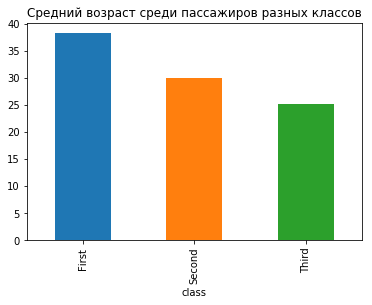

In [9]:
%matplotlib inline
grouped_by_class.mean().age.plot(
    kind='bar', title='Средний возраст среди пассажиров разных классов')

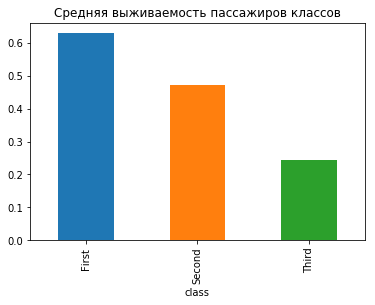

In [10]:
grouped_by_class.mean().survived.plot(
    kind='bar', title='Средняя выживаемость пассажиров классов')

Загрузим дополнительно данные о типе пассажира (мужчина, женцина или ребенок), и сгруппируем по 2 колонкам - классу и типу, а также нарисуем столбчатую диаграмму выживаемости.

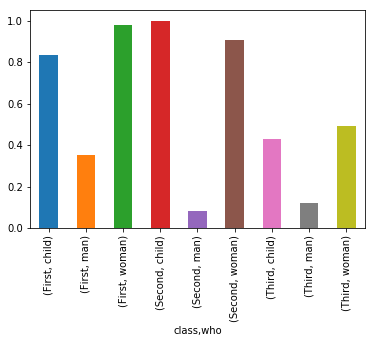

In [11]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')[
    ['survived', 'age', 'class', 'who']]
grouped_by_class_and_sex = titanic.groupby(['class', 'who'])
grouped_by_class_and_sex.mean().survived.plot(kind='bar', title="")

С помощью функции `agg()` можно делать более сложные агрегации, например указывать сразу несколько агрегационных функций.
 
Вернемся к первому объекты `grouped_by_class` и покажем эту функциональноть на его примере.

In [12]:
# в данном примере перед агрегацией мы дополнительно выбрали столбец age
grouped_by_class.age.agg(['min', 'mean', 'max'])

,min,mean,max
class,,,
First,0.92,38.233441,80.0
Second,0.67,29.877630,70.0
Third,0.42,25.140620,74.0


Также в качестве агрумента можно передать `dict`, в котором укажем различные агрегации для каждого столбца.

In [13]:
grouped_by_class.agg({'age': ['min', 'max'], 'survived': 'mean'})

survived   age      
            mean   min   max
class                       
First   0.629630  0.92  80.0
Second  0.472826  0.67  70.0
Third   0.242363  0.42  74.0

## Индексация в Python

Индексация - способ получить элемент контейнера по его порядковому номеру. В Python можно индексация работает для типов данных list, tuple и string.

Сгенерируем list и посмотрим на примеры.

In [14]:
my_list =  list(range(10))
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

В Python, как и в большинстве языков программирования, индексация начинается с нулевого элемента. Чтобы получить элемент по номеру, нужно задать этот номер целым числом в квадратных скобках рядом с контейнером. 

В Python порядковый индекс считать можно с начала и конца: первый элемент нулевой, последний - минус первый.

In [15]:
print(my_list[3]) # третий элемент списка
print(my_list[-1]) # последний элеменет списка
print(my_list[-5]) # пятый с конца элемент списка

3
9
5


Попытка обратиться к несуществущему номеру элемента вызовет ошибку индекса IndexError: list index out of range.

In [16]:
print(my_list[9]) # последний индекс списка, ok
print(my_list[10]) # несуществующий индекс, ошибка

9


IndexError: list index out of range

In [17]:
print(my_list[-10]) # первый элемент списка, ok
print(my_list[-11]) # несуществующий индекс, ошибка

0


IndexError: list index out of range

## Слайсинг с помощью индексов

Слайсинг - способ выбирать срез элементов по индексу. 

Базовый способ - задать диапазон по номеру начального и конечного элемента. Левый элемент включается, правый нет.

In [18]:
print(my_list[1:3]) # [начало:конец]
print(my_list[2:-2])

[1, 2]
[2, 3, 4, 5, 6, 7]


In [19]:
print(my_list[1:12:2]) # [начало:конец:шаг]
print(my_list[-2:1:-1]) # отрицательный шаг - движение в обратном направлении

[1, 3, 5, 7, 9]
[8, 7, 6, 5, 4, 3, 2]


При слайсинге выход индекса за размеры контейнера или указание шага с неверным знаком не вызывает ошибку. 

In [20]:
print(my_list[2:100:4]) # выход за границы контейнера
print(my_list[2:10:-1]) # отрицательный шаг вместо положительного
print(my_list[10:15:1]) # выход за границы контейнера

[2, 6]
[]
[]


Примеры с `tuple` и `set`

In [21]:
print('Yandex Praktikum'[0:6])
print((1, 2, 3)[2])

Yandex
3


## Data Series and Data Frame

Главная разница между этими двумя типами объектов в том, что `DataFrame` - это двумерный массив, таблица, а `DataSeries` - это одномерный массив, или столбец. 

Колонки `DataFrame` являются `DataSeries`. Проиллюстрируем в примере ниже.

In [22]:
# загрузим первые 10 строк таблицы в DataFrame
tips = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv').head(10)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Если выбрать любой столбец таблицы - получим `DataSeries`

In [23]:
bills = tips['total_bill']  # или tips.total_bill
print(bills)

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64


In [24]:
print(type(bills))  # убедимся, что тип дествительно Series

<class 'pandas.core.series.Series'>


Кстати, выбор строки тоже вернет Series - с именованными индексами


In [25]:
# выведем вторую строку
tips.loc[2]

total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object

In [26]:
# убедимся что это Series
type(tips.loc[2])

pandas.core.series.Series

In [27]:
# обратите внимание, индекс тут именованный
tips.loc[2].index

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Теперь, наоборот, создадим `DataFrame` из `Series`

In [28]:
waiter_names = pd.Series(
    [
        'Elena', 'Ivan', 'Dmitry', 'Dmitry', 'Elena',
        'Dmitry', 'Ivan', 'Elena', 'Ivan', 'Dmitry'
    ])
waiter_shift = pd.Series(
    [
        'morning', 'morning', 'evening', 'evening', 'evening',
        'evening', 'morning', 'evening', 'morning', 'evening'
    ])
waiters = pd.DataFrame(
    {
        'waiter_names': waiter_names,
        'waiter_shift': waiter_shift
    })

In [29]:
waiters

,waiter_names,waiter_shift
0,Elena,morning
1,Ivan,morning
2,Dmitry,evening
3,Dmitry,evening
4,Elena,evening
5,Dmitry,evening
6,Ivan,morning
7,Elena,evening
8,Ivan,morning
9,Dmitry,evening


Стоит помнить, что у `Series` и `DataFrame` индексация устроена по-разному.

`loc` и `iloc` выведут строку и в DataFrame, и в Series.

In [30]:
# в DataFrame
print(waiters.iloc[1])

waiter_names       Ivan
waiter_shift    morning
Name: 1, dtype: object


In [31]:
# так как Series - одномерный массив-столбец, то строка - это один элемент
print(waiter_shift.iloc[1])

morning


А вот обращение с помощью оператора с квадратными скобками или точки в случае `DataFrame` вернет столбец, а в случае `Series` аналогично `loc`/`iloc`

In [32]:
# в DataFrame
print(waiters['waiter_shift'])  # или waiters.waiter_names

0    morning
1    morning
2    evening
3    evening
4    evening
5    evening
6    morning
7    evening
8    morning
9    evening
Name: waiter_shift, dtype: object


In [33]:
# В Series
print(waiter_shift[1])

morning


 ## Удаление строк


Не совсем корректно говорить, что при удалении строк индекс `DataFrame` ломается. Рассмотрим, что происходит при удалении строк:


In [34]:
import pandas as pd
table = pd.DataFrame(
    data=[['BTC', 10000], ['LTC', 200], [
        'XRP', 1], ['ETH', 1000], ['DOGE', 200]],
    columns=['symbol', 'price'])
table

,symbol,price
0,BTC,10000
1,LTC,200
2,XRP,1
3,ETH,1000
4,DOGE,200


При создании `DataFrame` в случае, если индекс специально не указан, pandas создает индекс по умоланию - `range(0, <количество строк>)`

In [35]:
table.index

RangeIndex(start=0, stop=5, step=1)

Несмотря на то, что этот индекс - числовой, он является не подрядковым номером, а лейблом, именем строки и служит для ее идентификации. 

Поэтому при удалении или переупорядочивании строк этот индекс ведет себя как лейбл, закрепленный за строкой.

In [36]:
table.drop([1], inplace=True)
table

,symbol,price
0,BTC,10000
2,XRP,1
3,ETH,1000
4,DOGE,200


In [37]:
# поведение индекса при сортировке
table.sort_values('price')

,symbol,price
2,XRP,1
4,DOGE,200
3,ETH,1000
0,BTC,10000


In [38]:
# по этой же причине второй раз удалить по тому же индексу нельзя
table.drop([1], inplace=True)

KeyError: '[1] not found in axis'

Если требуется обратиться по порядковому номеру строки, то вместо `[]`, `loc` и `.` следует использовать `iloc`

In [39]:
table

,symbol,price
0,BTC,10000
2,XRP,1
3,ETH,1000
4,DOGE,200


In [40]:
table.iloc[1]

symbol    XRP
price       1
Name: 2, dtype: object

Если после манипуляций со строками хочется вернуть индексы по порядку строк, следует использовать специальную функцию `reset_index()`:

In [41]:
table.reset_index(drop=True, inplace=True)
table

,symbol,price
0,BTC,10000
1,XRP,1
2,ETH,1000
3,DOGE,200
